# Read initial model and plot velocity in horizontal section

In [2]:
from pytomoatt.model import ATTModel
from pytomoatt.data import ATTData

import numpy as np

# initial model hdf5 file
initial_model_file = 'models/model_N161_161_161.h5'
# input parameters file
par_file = 'input_params/input_params_N161.yaml'

# read model file by pytomoatt
model = ATTModel.read(initial_model_file, par_file)
initial_model = model.to_xarray()

# we can access the velocity at arbitrary depth
depth = 6371 - 6150
tmp = initial_model.interp_dep(depth, field='vel')
print("The shape of initial model array is ", tmp.shape)
lon = tmp[:,0]
lat = tmp[:,1]
vel = tmp[:,2]

# 画水平切面 速度结构图
import sys
sys.path.append('../utils')
from functions_for_plot import plot_profile

# fname = 'img/1a_vel_dep.png'
# fig = plot_profile( lon,lat,vel,
#                     fname       = fname,
#                     region      = [15,40,30,50],
#                     projection  = "D27.5/40/35/45/12c",
#                     frame       = ["xa5+lLongitude", "ya5+lLatitude", "nSWe"],
#                     spacing     = [0.1, 0.1],
#                     cpt_range   = [4.5,9.5],
#                     cpt_gap     = 1,
#                     colorbar    = "Vp (km/s)",)

The shape of initial model array is  (25921, 3)


# 读取走时场，计算走时场误差

The shape of initial model array is  (25921, 3)


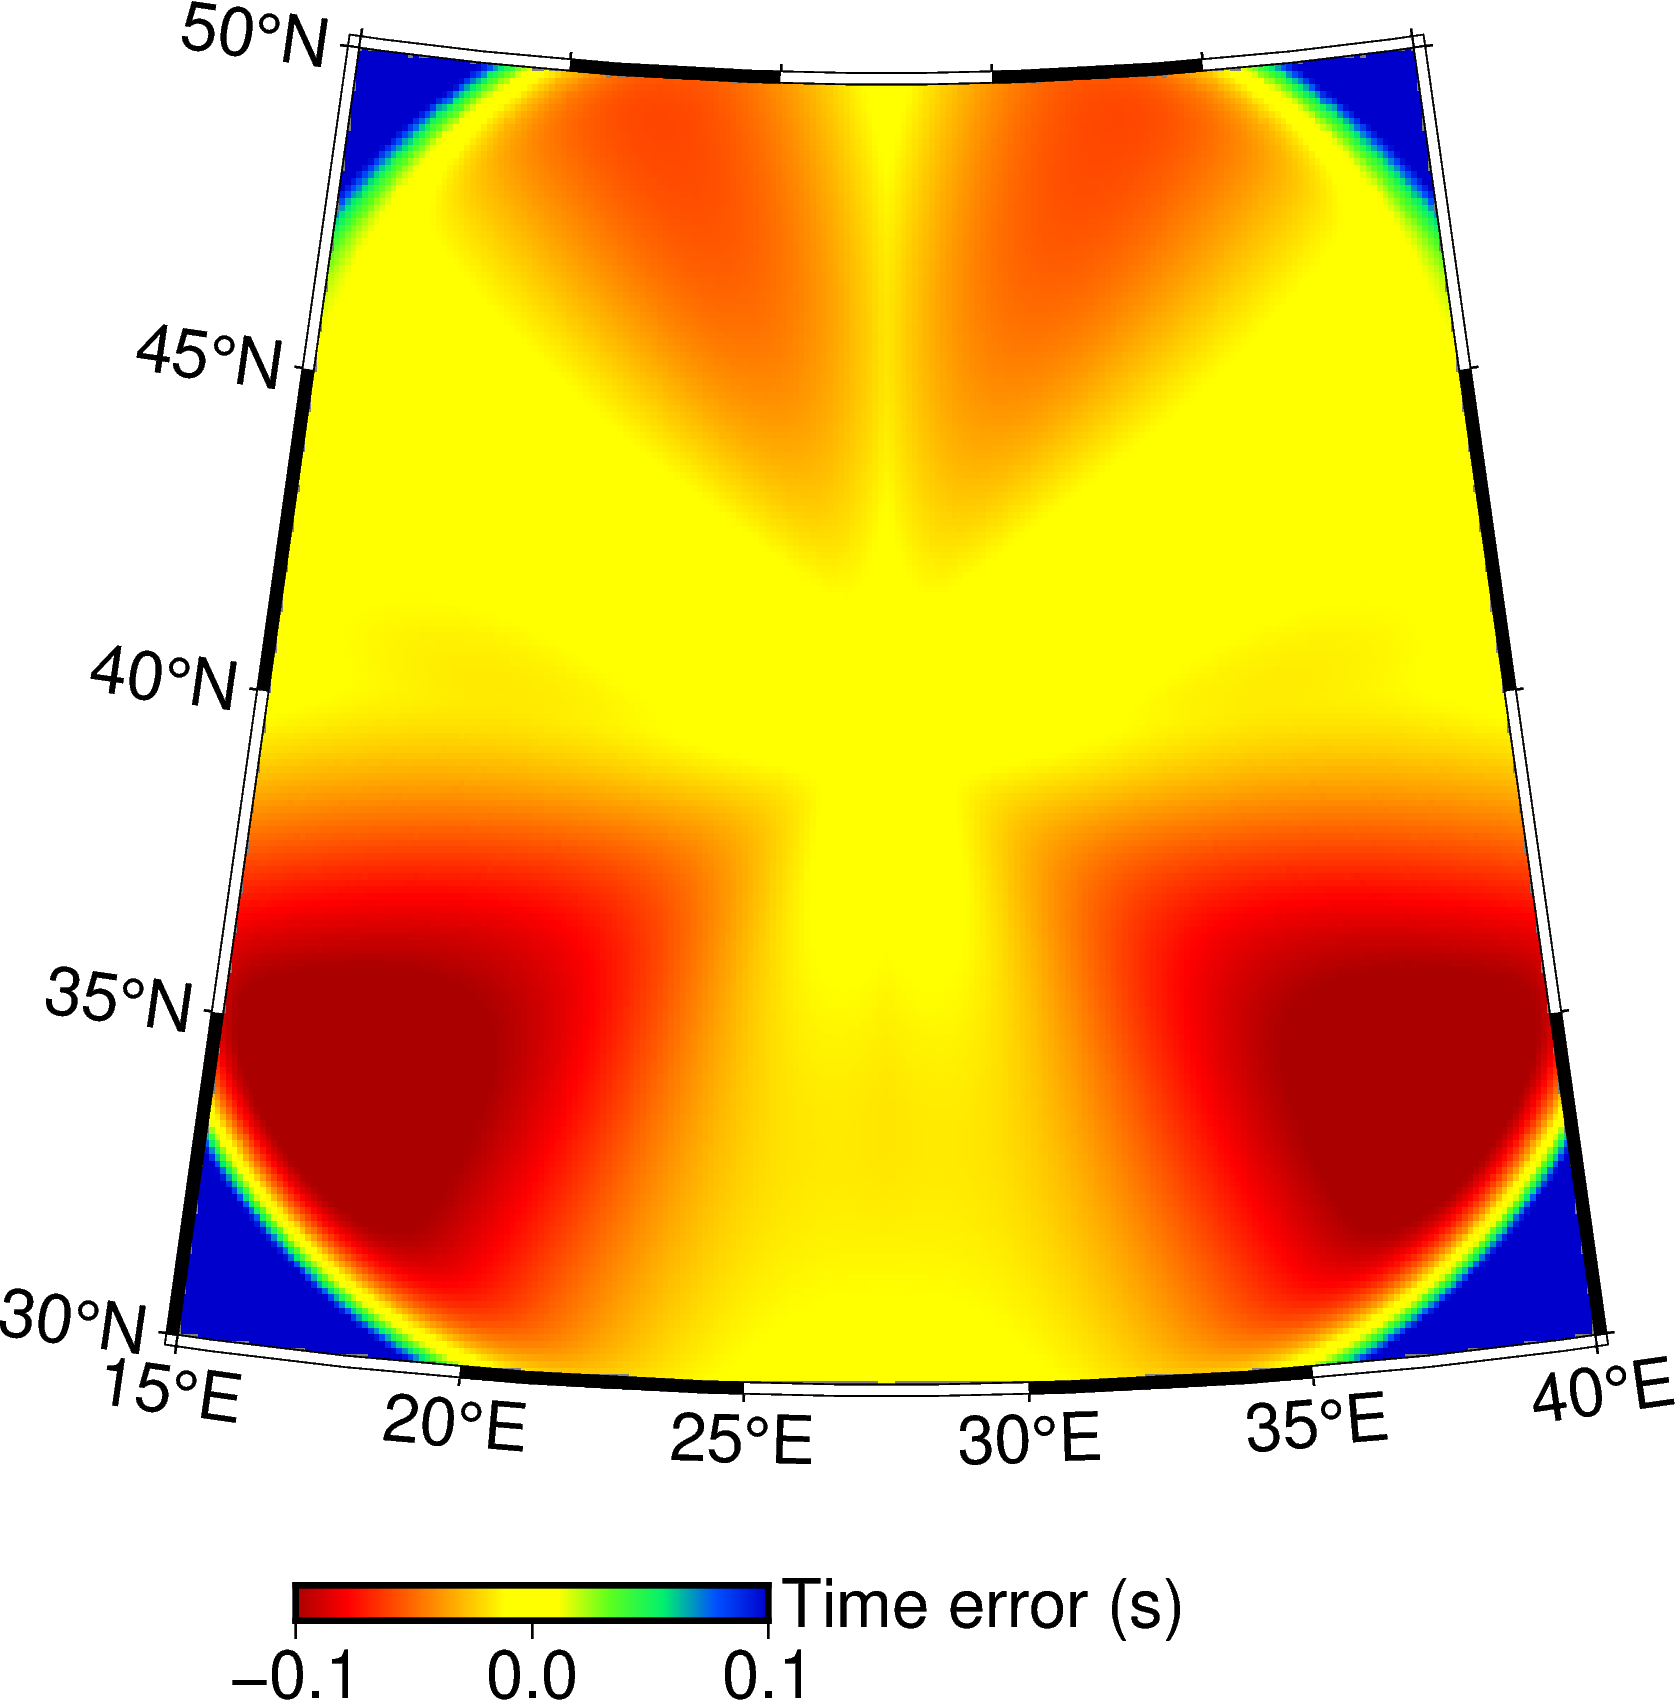

In [3]:
# file to be read
input_file = 'OUTPUT_FILES_N161_161_161/out_data_sim_group_0.h5'
# input parameters file
par_file = 'input_params/input_params_N161.yaml'
# grid file
grid_file = 'OUTPUT_FILES_N161_161_161/out_data_grid.h5'

# read traveltime field
group   = "src_s0"          # "src_$src_name"
dataset1 = "T_res_inv_0000"  # "T_res_inv_$iter"
data = ATTData.read(input_file, par_file, grid_file, group, dataset1)
time_field_syn = data.to_xarray()

input_file = "models/solution_N161_161_161.h5"
dataset2 = "T_res"
data = ATTData.read(input_file, par_file, grid_file, group, dataset2)
time_field_true = data.to_xarray()

# 画水平切面 走时误差

# depth = 221 # 震源深度
depth = 221

tmp = time_field_syn.interp_dep(depth, field=dataset1)
print("The shape of initial model array is ", tmp.shape)
lon = tmp[:,0]
lat = tmp[:,1]
time_syn = tmp[:,2]

time_true = time_field_true.interp_dep(depth, field=dataset2)[:,2]

time_error = time_syn - time_true

fname = 'img/1a_error_dep.png'
fig = plot_profile( lon,lat,time_error,
                    fname       = fname,
                    region      = [15,40,30,50],
                    projection  = "D27.5/40/35/45/12c",
                    frame       = ["xa5+lLongitude", "ya5+lLatitude", "nSWe"],
                    spacing     = [0.1, 0.1],
                    cpt_range   = [-0.1,0.1],
                    cpt_gap     = 0.1,
                    colorbar    = "Time error (s)",)

surface [WARNING]: (y_max-y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
surface (gmt_api.c:2034(gmtapi_init_grdheader)): Please select compatible -R and -I values
surface [WARNING]: (y_max-y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
surface (gmt_api.c:2034(gmtapi_init_grdheader)): Please select compatible -R and -I values
surface [WARNING]: (y_max-y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
surface (gmt_api.c:2034(gmtapi_init_grdheader)): Please select compatible -R and -I values
surface [WARNING]: 303462 unusable points were supplied; these will be ignored.
surface [WARNING]: You should have pre-processed the data with block-mean, -median, or -mode.
surface [WARNING]: Check that previous processing steps write results with enough decimals.
surface [WARNING]: Possibly some data were half-way between nodes and subject to IEEE 754 rounding.


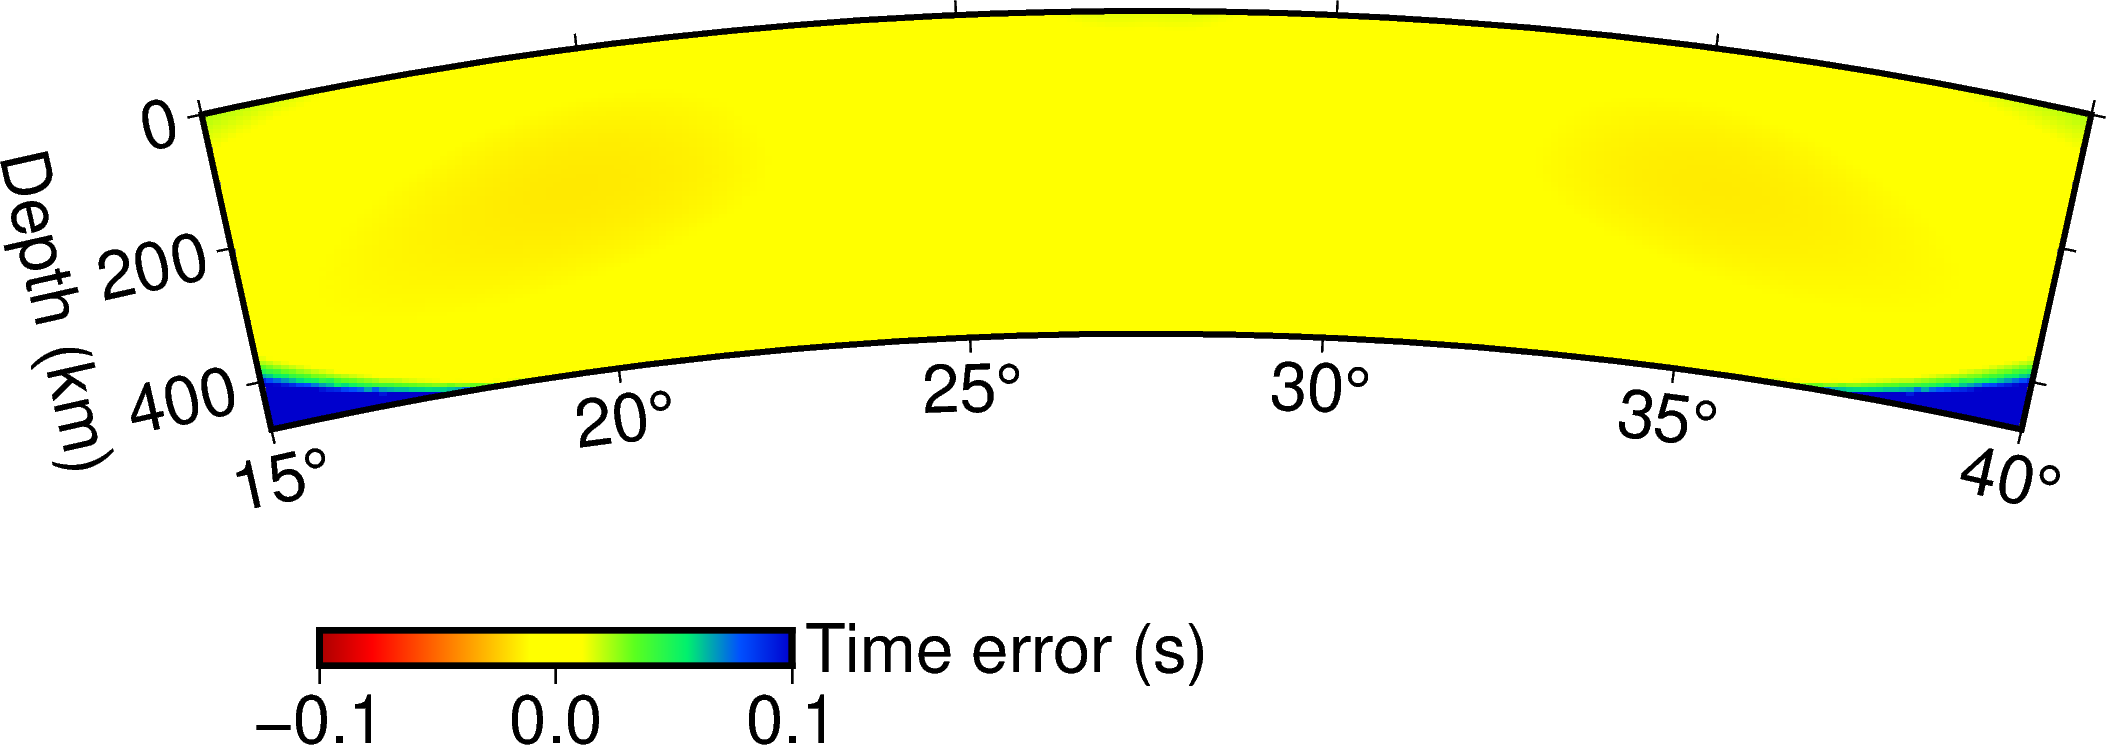

In [10]:
all_start = [
    [30.0, 30.5],
    [30.5, 30.0],
]
all_end = [
    [32.0, 30.5],
    [30.5, 32.0],
]

start   = [15, 40]
end     = [40, 40]

tmp = time_field_syn.interp_sec(start, end, field=dataset1,val=1)
lon = tmp[:,0]
dep = tmp[:,3]
time_syn = tmp[:,4]
time_true = time_field_true.interp_sec(start, end, field=dataset2,val=1)[:,4]
time_error = time_syn - time_true

fname = 'img/1a_error_lat.png'
fig = plot_profile( lon,6371-dep,time_error,
                    fname       = fname,
                    region      = [15,40,5900,6371],
                    projection  = "P16c+a+t27.5+z",
                    frame       = ["xa5", "ya200+lDepth (km)", "nSWe"],
                    spacing     = [0.1, 5],
                    cpt_range   = [-0.1,0.1],
                    cpt_gap     = 0.1,
                    colorbar    = "Time error (s)",)

surface [WARNING]: (y_max-y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
surface (gmt_api.c:2034(gmtapi_init_grdheader)): Please select compatible -R and -I values
surface [WARNING]: (y_max-y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
surface (gmt_api.c:2034(gmtapi_init_grdheader)): Please select compatible -R and -I values
surface [WARNING]: (y_max-y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
surface (gmt_api.c:2034(gmtapi_init_grdheader)): Please select compatible -R and -I values
surface [WARNING]: 303462 unusable points were supplied; these will be ignored.
surface [WARNING]: You should have pre-processed the data with block-mean, -median, or -mode.
surface [WARNING]: Check that previous processing steps write results with enough decimals.
surface [WARNING]: Possibly some data were half-way between nodes and subject to IEEE 754 rounding.


The shape of initial model array is  (342608, 5)


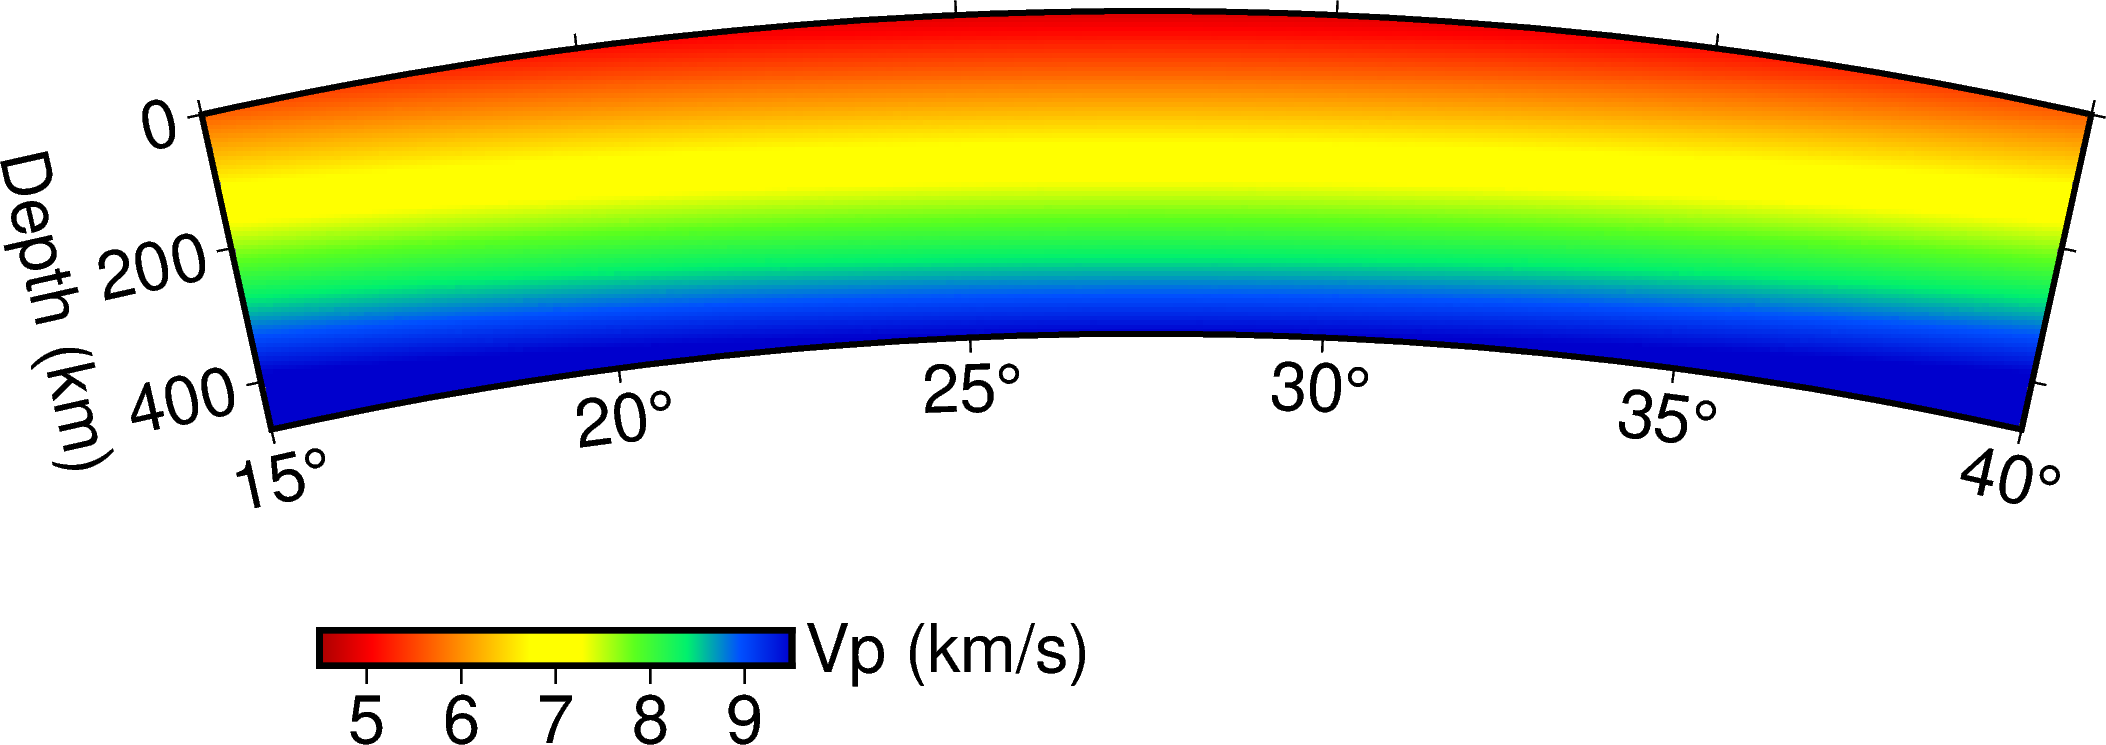

In [11]:

# we can also access the velocity at arbitrary vertical profile
tmp = initial_model.interp_sec(start, end, field='vel', val = 1)    # lon, lat, dis, dep, vel
print("The shape of initial model array is ", tmp.shape)

lon = tmp[:,0]
dep = tmp[:,3]
vel = tmp[:,4]

fname = 'img/1a_vel_lat.png'
fig = plot_profile( lon,6371-dep,vel,
                    fname       = fname,
                    region      = [15,40,5900,6371],
                    projection  = "P16c+a+t27.5+z",
                    frame       = ["xa5", "ya200+lDepth (km)", "nSWe"],
                    spacing     = [0.1, 5],
                    cpt_range   = [4.5,9.5],
                    cpt_gap     = 1,
                    colorbar    = "Vp (km/s)",)